<a href="https://colab.research.google.com/github/joeseeun/IT-/blob/main/1915683_%EC%A1%B0%EC%84%B8%EC%9D%80_%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#시각화 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

1. 데이터 불러오기

In [2]:
#데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv")

In [4]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#필요한 라이브러리 import
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
import mglearn

In [7]:
plt.rc('font', family='NanumBarunGothic')

2. 데이터 전처리

In [8]:
df = data.copy()
print(df.shape)

(10000, 31)


In [9]:
display(df.head()) 
print(df.info()) 
print(df.describe())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [10]:
df.info(verbose=True, show_counts=True)

#결측치 있는 데이터= 수축기혈압, 이완기혈압, 식전혈당(공복혈당),혈색소, 혈청크레아티닌, (혈청지오티)AST ,(혈청지오티)AST,(혈청지오티)ALT, 감마지티피: 9912개
#총콜레스테롤, 트리글리세라이드, HDL콜레스테롤: 4044개 등

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [11]:
#데이터 컬럼명 간단하게 변경

# 신장(5Cm단위) -> 신장
# 체중(5Kg 단위) -> 체중
# 연령대코드(5세단위) -> 연령대코드
# 식전혈당(공복혈당) -> 식전혈당

df.rename(columns={'신장(5Cm단위)': '신장', '체중(5Kg 단위)': '체중','연령대코드(5세단위)' : '연령대', '식전혈당(공복혈당)' : '식전혈당', }, inplace=True)

In [12]:
#결측치있는 행 제거 

df.info()

df_1= df.drop(['기준년도','가입자일련번호','구강검진수검여부','데이터공개일자'],axis=1)

df_1 = df_1.dropna(axis=0)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준년도        10000 non-null  int64  
 1   가입자일련번호     10000 non-null  int64  
 2   시도코드        10000 non-null  int64  
 3   성별코드        10000 non-null  object 
 4   연령대         10000 non-null  int64  
 5   신장          10000 non-null  int64  
 6   체중          10000 non-null  int64  
 7   허리둘레        10000 non-null  float64
 8   시력(좌)       10000 non-null  float64
 9   시력(우)       10000 non-null  float64
 10  청력(좌)       10000 non-null  int64  
 11  청력(우)       10000 non-null  int64  
 12  수축기혈압       9912 non-null   float64
 13  이완기혈압       9912 non-null   float64
 14  식전혈당        9912 non-null   float64
 15  총콜레스테롤      4044 non-null   float64
 16  트리글리세라이드    4044 non-null   float64
 17  HDL콜레스테롤    4044 non-null   float64
 18  LDL콜레스테롤    3977 non-null   float64
 19  혈색소         9912 non-null 

3. 음주여부에 따른 비만여부를 알아보기 위해 BMI계산 및 열 만들기

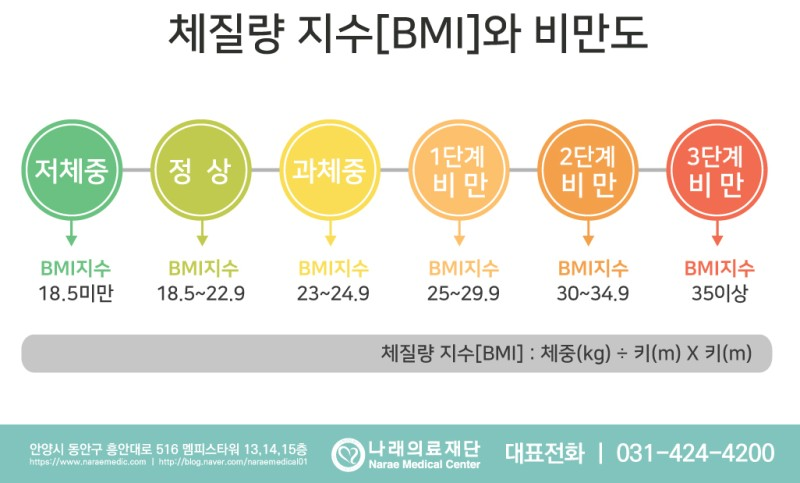

이미지 출처: 나래의료재단 https://www.naraemedic.com

In [13]:
#BMI 계산 및 열 만들기

df_1['BMI'] = df_1['체중'] /  (df_1['신장'] *  df_1['신장']) * 10000
df_1.head()

,시도코드,성별코드,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,치아우식증유무,치석,BMI
6,44,M,9,165,80,93.0,0.8,0.7,1,2,...,1.0,0.7,18.0,20.0,35.0,Yes,Yes,0.0,1.0,29.384757
16,30,M,11,160,65,90.0,0.6,0.6,1,1,...,1.0,1.0,29.0,54.0,24.0,No,Yes,0.0,1.0,25.390625
21,41,F,11,155,50,65.9,0.7,1.0,1,1,...,1.0,0.8,24.0,14.0,12.0,No,No,0.0,0.0,20.811655
27,11,M,17,155,60,82.0,0.5,0.7,1,1,...,1.0,1.4,33.0,22.0,29.0,No,Yes,0.0,0.0,24.973985
47,26,M,16,165,65,94.0,1.5,0.6,2,2,...,1.0,1.0,28.0,20.0,43.0,No,Yes,0.0,0.0,23.875115


In [14]:
#BMI지수에 따른 Fat 열 추가
#BMI 25미만=0
#BMI 25이상 비만=1 

Fat = []
for row in df_1['BMI'] : 
  if row <= 25:
    Fat.append('0')
  else:
    Fat.append('1')

df_1['Fat'] = Fat

df_1.head()

,시도코드,성별코드,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,치아우식증유무,치석,BMI,Fat
6,44,M,9,165,80,93.0,0.8,0.7,1,2,...,0.7,18.0,20.0,35.0,Yes,Yes,0.0,1.0,29.384757,1
16,30,M,11,160,65,90.0,0.6,0.6,1,1,...,1.0,29.0,54.0,24.0,No,Yes,0.0,1.0,25.390625,1
21,41,F,11,155,50,65.9,0.7,1.0,1,1,...,0.8,24.0,14.0,12.0,No,No,0.0,0.0,20.811655,0
27,11,M,17,155,60,82.0,0.5,0.7,1,1,...,1.4,33.0,22.0,29.0,No,Yes,0.0,0.0,24.973985,0
47,26,M,16,165,65,94.0,1.5,0.6,2,2,...,1.0,28.0,20.0,43.0,No,Yes,0.0,0.0,23.875115,0


In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시도코드        1249 non-null   int64  
 1   성별코드        1249 non-null   object 
 2   연령대         1249 non-null   int64  
 3   신장          1249 non-null   int64  
 4   체중          1249 non-null   int64  
 5   허리둘레        1249 non-null   float64
 6   시력(좌)       1249 non-null   float64
 7   시력(우)       1249 non-null   float64
 8   청력(좌)       1249 non-null   int64  
 9   청력(우)       1249 non-null   int64  
 10  수축기혈압       1249 non-null   float64
 11  이완기혈압       1249 non-null   float64
 12  식전혈당        1249 non-null   float64
 13  총콜레스테롤      1249 non-null   float64
 14  트리글리세라이드    1249 non-null   float64
 15  HDL콜레스테롤    1249 non-null   float64
 16  LDL콜레스테롤    1249 non-null   float64
 17  혈색소         1249 non-null   float64
 18  요단백         1249 non-null   float64
 19  혈청크레아티닌     1249 non-null  

In [19]:
#BMI 결측치 행 삭제
df_2 = df_1.drop(['BMI'], axis=1)
df_2

,시도코드,성별코드,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,치아우식증유무,치석,Fat
6,44,M,9,165,80,93.0,0.8,0.7,1,2,...,1.0,0.7,18.0,20.0,35.0,Yes,Yes,0.0,1.0,1
16,30,M,11,160,65,90.0,0.6,0.6,1,1,...,1.0,1.0,29.0,54.0,24.0,No,Yes,0.0,1.0,1
21,41,F,11,155,50,65.9,0.7,1.0,1,1,...,1.0,0.8,24.0,14.0,12.0,No,No,0.0,0.0,0
27,11,M,17,155,60,82.0,0.5,0.7,1,1,...,1.0,1.4,33.0,22.0,29.0,No,Yes,0.0,0.0,0
47,26,M,16,165,65,94.0,1.5,0.6,2,2,...,1.0,1.0,28.0,20.0,43.0,No,Yes,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,30,M,9,180,70,87.5,1.2,0.9,1,1,...,1.0,0.9,22.0,21.0,19.0,No,Yes,0.0,1.0,0
9963,41,F,13,160,75,107.4,0.8,0.8,1,1,...,1.0,0.8,20.0,15.0,14.0,No,Yes,1.0,1.0,1
9965,45,F,12,155,60,80.0,1.5,1.0,1,1,...,1.0,0.6,22.0,9.0,29.0,No,No,0.0,0.0,0
9967,11,M,12,170,80,90.0,0.9,0.9,1,1,...,1.0,0.7,27.0,36.0,66.0,NotNow,Yes,0.0,2.0,1


3. 모델 적용

1) 의사결정나무

In [26]:
#의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [31]:
X = df_2.drop(['Fat'], axis = 1) 
y = df_2['Fat']
X

,시도코드,성별코드,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,치아우식증유무,치석
6,44,1,9,165,80,93.0,0.8,0.7,1,2,...,15.7,1.0,0.7,18.0,20.0,35.0,2,1,0.0,1.0
16,30,1,11,160,65,90.0,0.6,0.6,1,1,...,16.6,1.0,1.0,29.0,54.0,24.0,0,1,0.0,1.0
21,41,0,11,155,50,65.9,0.7,1.0,1,1,...,11.8,1.0,0.8,24.0,14.0,12.0,0,0,0.0,0.0
27,11,1,17,155,60,82.0,0.5,0.7,1,1,...,14.3,1.0,1.4,33.0,22.0,29.0,0,1,0.0,0.0
47,26,1,16,165,65,94.0,1.5,0.6,2,2,...,16.3,1.0,1.0,28.0,20.0,43.0,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,30,1,9,180,70,87.5,1.2,0.9,1,1,...,15.1,1.0,0.9,22.0,21.0,19.0,0,1,0.0,1.0
9963,41,0,13,160,75,107.4,0.8,0.8,1,1,...,14.0,1.0,0.8,20.0,15.0,14.0,0,1,1.0,1.0
9965,45,0,12,155,60,80.0,1.5,1.0,1,1,...,13.8,1.0,0.6,22.0,9.0,29.0,0,0,0.0,0.0
9967,11,1,12,170,80,90.0,0.9,0.9,1,1,...,15.0,1.0,0.7,27.0,36.0,66.0,1,1,0.0,2.0


In [32]:
# 데이터셋을 학습(train)과 테스트(test) 세트로 분할

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.984


In [35]:
# 의사결정나무의 깊이를 4로 제한하면 시험용 데이터에 대한 성능이 하락함
# 과적합(overfitting): 학습용 데이터에 대해서만 성능이 좋고 새로운 데이터에 적용했을 경우에는 성능이 좋지 않은 경우

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.908
시험용 데이터 정확도: 0.879


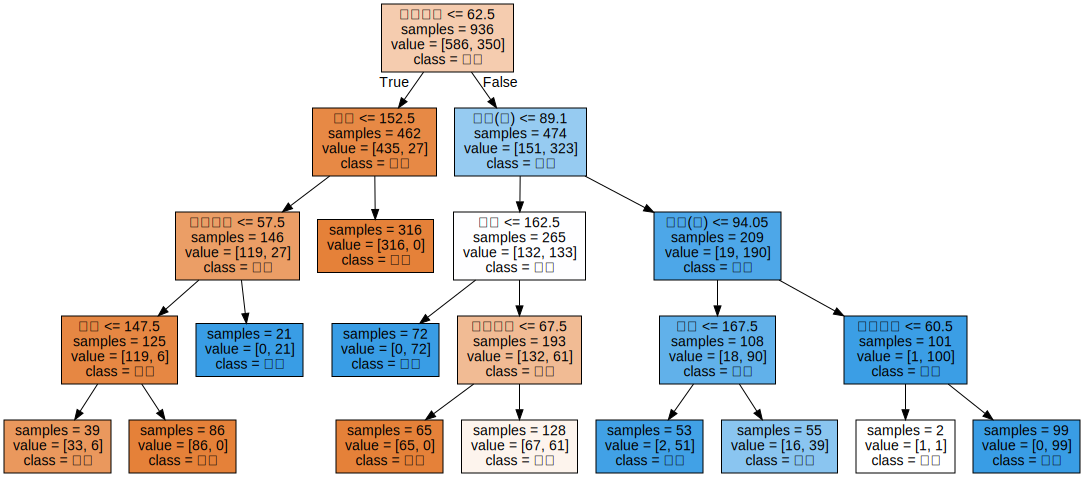

In [37]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "비만", "정상"],
                feature_names=df_2.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

주요 변수들 (features)

의사결정나무를 생성하는데 비중이 큰 변수들을 찾을 수 있지만, feature importance가 낮다고 하여 그 변수가 중요하지 않다는 것은 아님 (이 나무에서 그 변수가 사용되지 않았을 뿐 다른 변수가 동일한 정보를 지니고 있어서일 수도 있음)

의사결정나무를 생성하는데 중요도가 높다는 것은 알 수 있지만, 양성을 지지하는지 악성을 지지하는지는 알 수 없음

In [38]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.         0.         0.18003951 0.69434183 0.12270743
 0.         0.         0.         0.         0.         0.00291124
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


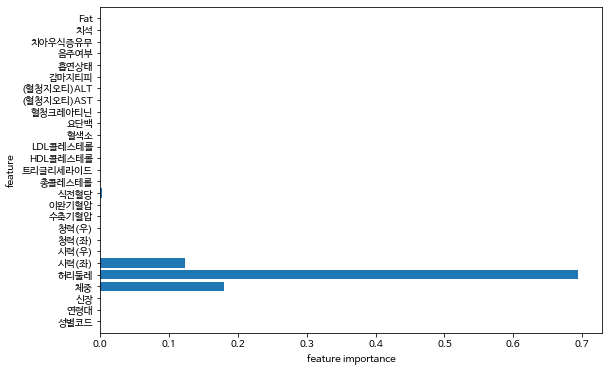

In [39]:
import numpy as np

def plot_feature_importances_df(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(df_2.columns[1:])  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df_2.columns[1:])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_df(tree)

비만의 주요 변수로는 허리둘레, 체중, 시력(좌), 그리고 미세하지만 식전혈당이 나왔다.


의사결정나무 모델의 단점은 사전 가지치기 (예. 나무의 깊이 줄이기)를 사용해도 과적합되는 경향이 있다.

-> 이를 해결하기 위해서 단일 의사결정나무 대신 앙상블 방법 사용

2) 랜덤포레스트

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


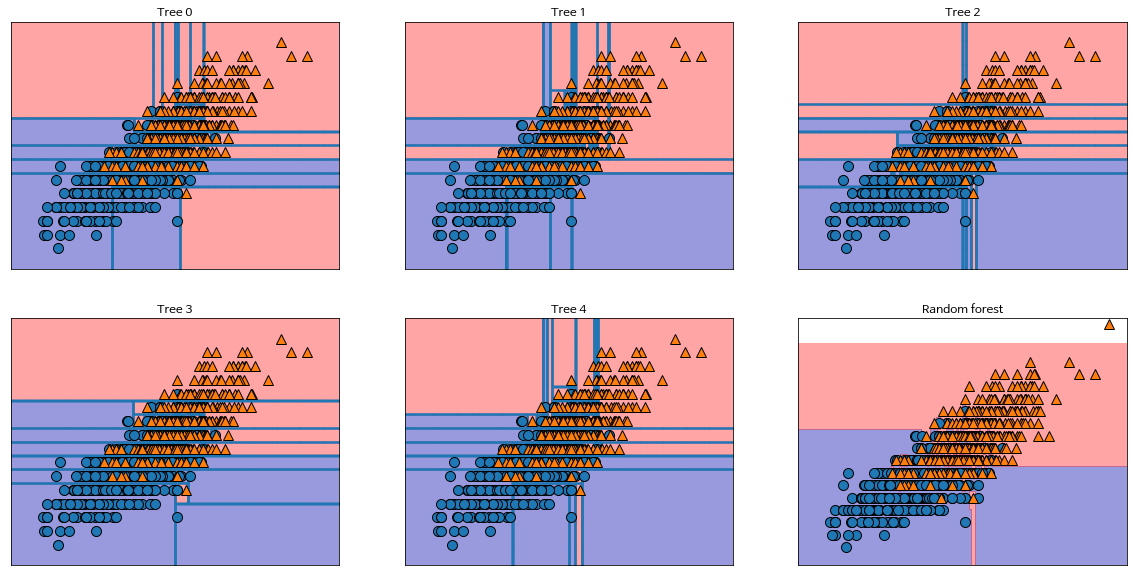

In [42]:
from sklearn.ensemble import RandomForestClassifier

# '허리둘레','체중' 변수만 이용하여 
# 5개의 나무를 만드는 예 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train[['허리둘레','체중']], y_train)

# 5개 나무 각각의 분류 경계를 그림 (서로 모양이 많이 다르다)
# 2차원으로 나무의 결과를 보여주기 위한 코드로 mglearn의 함수들을 이용 - 여기서는 설명 생략
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train[['허리둘레','체중']].values, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train[['허리둘레','체중']].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X['허리둘레'], X['체중'], y)
plt.show()

In [43]:
# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.891


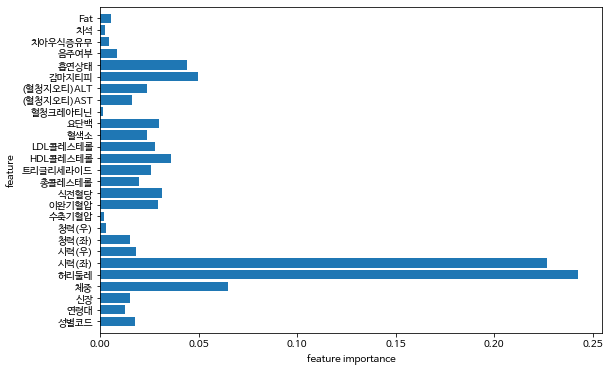

In [44]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_df(forest)

랜덤 포레스트와 단일 의사결정나무 비교

라인 차트를 그려봄으로써 랜덤포레스트가 의사결정트리보다 매번 정확도가 높은 것을 확인할 수 있다.

In [45]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean()))

Accuracy
Decision tree:  [0.76595745 0.74468085 0.78723404 0.69148936 0.76595745 0.75531915
 0.88172043 0.79569892 0.65591398 0.7311828 ]
Random forest:  [0.90425532 0.91489362 0.88297872 0.94680851 0.86170213 0.92553191
 0.88172043 0.92473118 0.89247312 0.83870968]
Accuracy mean
Decision tree :0.758
Random forest :0.897


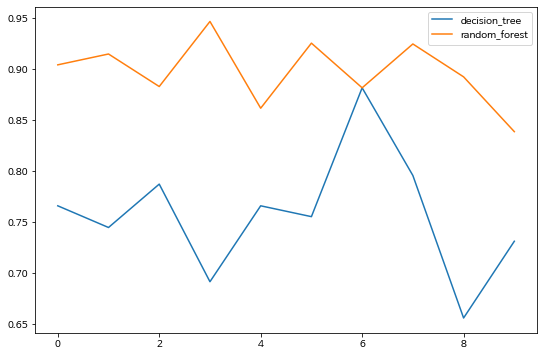

In [48]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))

df.plot()

분류 모델을 통한 인사이트 도출

1. 랜덤포레스트의 정확도는 0.897, 의사결정나무의 정확도는 0.764로 랜덤포레스트의 정확도가 더 높다
2. 랜덤포레스트 기준으로 볼때 비만여부에 영향을 미치는 주요 변수는 허리둘레, 시력(좌), 체중이다.
3. 일반적으로 시력과 비만은 상관관계가 없다고 알고있는데, 시력(좌)가 주요 변수로 나온것은 좀더 연구가 필요할듯 하다.
4. 의사결정나무를 생성하는데 비중이 큰 변수들을 찾을 수 있지만, feature importance가 낮다고 하여 그 변수가 중요하지 않다는 것은 아님 (공복혈당, 총콜레스테롤, 음주여부 등)